<a href="https://colab.research.google.com/github/lukmanbayhaqi/population-eda/blob/master/population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas

In [132]:
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

In [133]:
population = pd.read_csv('data-penduduk-mojokerto.csv', index_col=0)
population.head()

,kab_kota,tahun,kecamatan,kelurahan,kelahiran,kematian,mutasi_datang,mutasi_keluar
propinsi,,,,,,,,
Jawa_Timur,Kota_Mojokerto,2016,Prajurit_Kulon,Mentikan,87,61,84,108
Jawa_Timur,Kota_Mojokerto,2016,Prajurit_Kulon,Kauman,50,25,59,52
Jawa_Timur,Kota_Mojokerto,2016,Prajurit_Kulon,Pulorejo,122,71,170,68
Jawa_Timur,Kota_Mojokerto,2016,Prajurit_Kulon,Prajurit_kulon,122,52,164,84
Jawa_Timur,Kota_Mojokerto,2016,Prajurit_Kulon,Surodinawan,129,42,271,119


In [134]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Jawa_Timur to Jawa_Timur
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   kab_kota       18 non-null     object
 1   tahun          18 non-null     int64 
 2   kecamatan      18 non-null     object
 3   kelurahan      18 non-null     object
 4   kelahiran      18 non-null     int64 
 5   kematian       18 non-null     int64 
 6   mutasi_datang  18 non-null     int64 
 7   mutasi_keluar  18 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 1.3+ KB


In [135]:
population.describe()

,tahun,kelahiran,kematian,mutasi_datang,mutasi_keluar
count,18.00,18.00,18.00,18.00,18.00
mean,2016.00,96.83,78.33,149.39,117.67
std,0.00,73.31,52.22,94.98,88.26
min,2016.00,11.00,25.00,23.00,28.00
25%,2016.00,51.50,41.25,65.25,62.75
50%,2016.00,81.50,57.50,141.50,93.00
75%,2016.00,122.00,103.00,181.25,128.75
max,2016.00,279.00,207.00,342.00,392.00


In [136]:
for column in population.columns:
    print(f"{column}: Number of unique values {population[column].nunique()}")
    print("==========================================================")

kab_kota: Number of unique values 1
tahun: Number of unique values 1
kecamatan: Number of unique values 3
kelurahan: Number of unique values 18
kelahiran: Number of unique values 16
kematian: Number of unique values 16
mutasi_datang: Number of unique values 18
mutasi_keluar: Number of unique values 18


In [137]:
population.drop(['kab_kota', 'tahun'], axis="columns", inplace=True)

In [138]:
len(object_col)

2

In [139]:
from sklearn.preprocessing import LabelEncoder

In [140]:
label = LabelEncoder()
population["kecamatan"] = label.fit_transform(population.kecamatan)

In [141]:
cont_col = []
for column in population.columns:
    if population[column].dtypes != object and population[column].nunique() > 30:
        print(f"{column} : Minimum: {population[column].min()}, Maximum: {population[column].max()}")
        cont_col.append(column)
        print("====================================")

<Axes: xlabel='kelahiran', ylabel='kecamatan'>

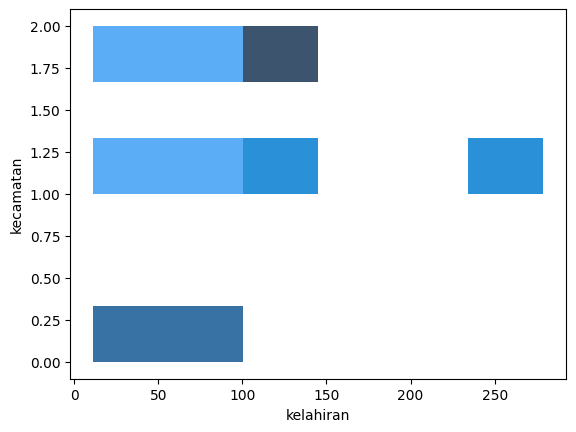

In [142]:
sns.histplot(data=population, y="kecamatan", x="kelahiran")

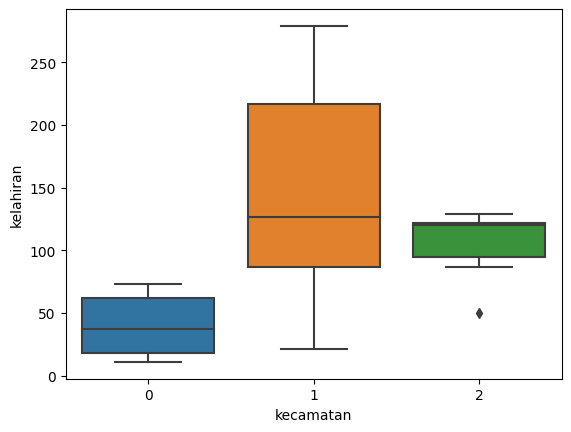

In [143]:
sns.boxplot(x='kecamatan',y ='kelahiran',data= population,palette=None, saturation=0.75, dodge=True, fliersize=5,
            linewidth=None, whis=1, ax=None)
plt.show()

<Axes: xlabel='kematian', ylabel='kecamatan'>

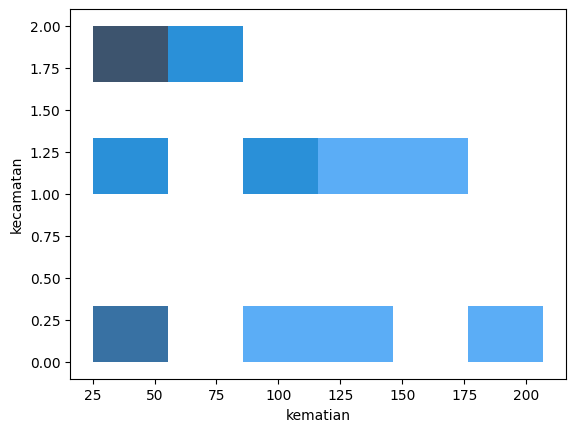

In [144]:
sns.histplot(data=population, y="kecamatan", x="kematian")

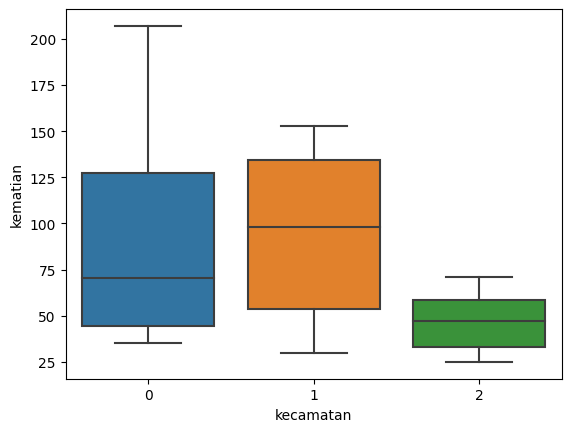

In [145]:
sns.boxplot(x='kecamatan',y ='kematian',data= population,palette=None, saturation=0.75, dodge=True, fliersize=5,
            linewidth=None, whis=1, ax=None)
plt.show()

<Axes: xlabel='mutasi_datang', ylabel='kecamatan'>

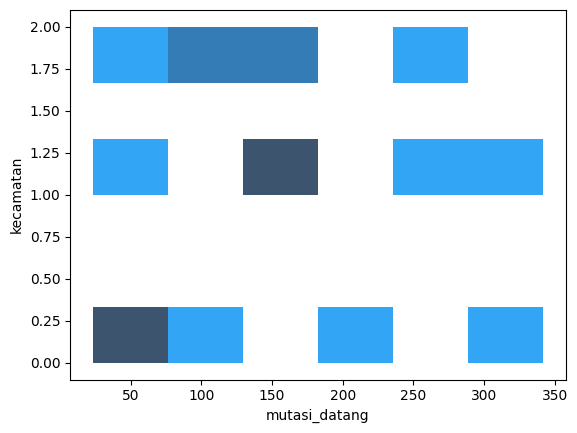

In [146]:
sns.histplot(data=population, y="kecamatan", x="mutasi_datang")

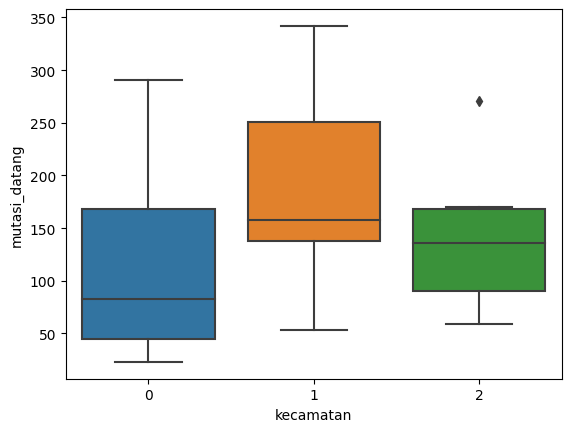

In [147]:
sns.boxplot(x='kecamatan',y ='mutasi_datang',data= population,palette=None, saturation=0.75, dodge=True, fliersize=5,
            linewidth=None, whis=1, ax=None)
plt.show()

<Axes: xlabel='mutasi_keluar', ylabel='kecamatan'>

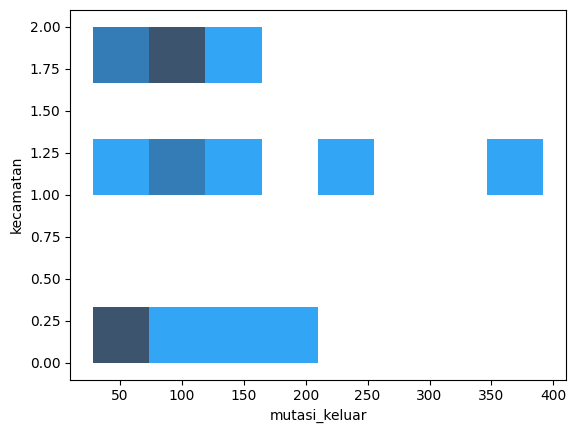

In [148]:
sns.histplot(data=population, y="kecamatan", x="mutasi_keluar")

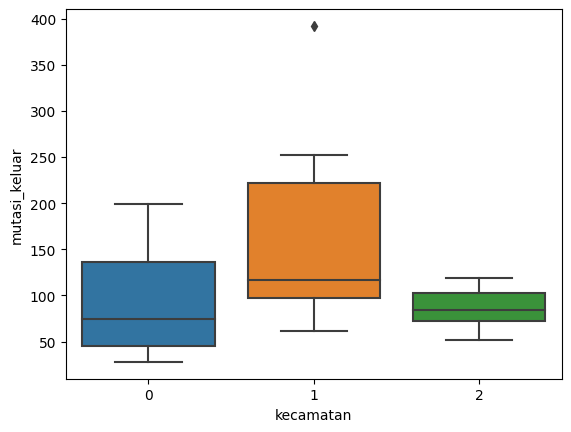

In [149]:
sns.boxplot(x='kecamatan',y ='mutasi_keluar',data= population,palette=None, saturation=0.75, dodge=True, fliersize=5,
            linewidth=None, whis=1, ax=None)
plt.show()

<ipython-input-150-4f4228b32d33>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(population.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})


<Axes: >

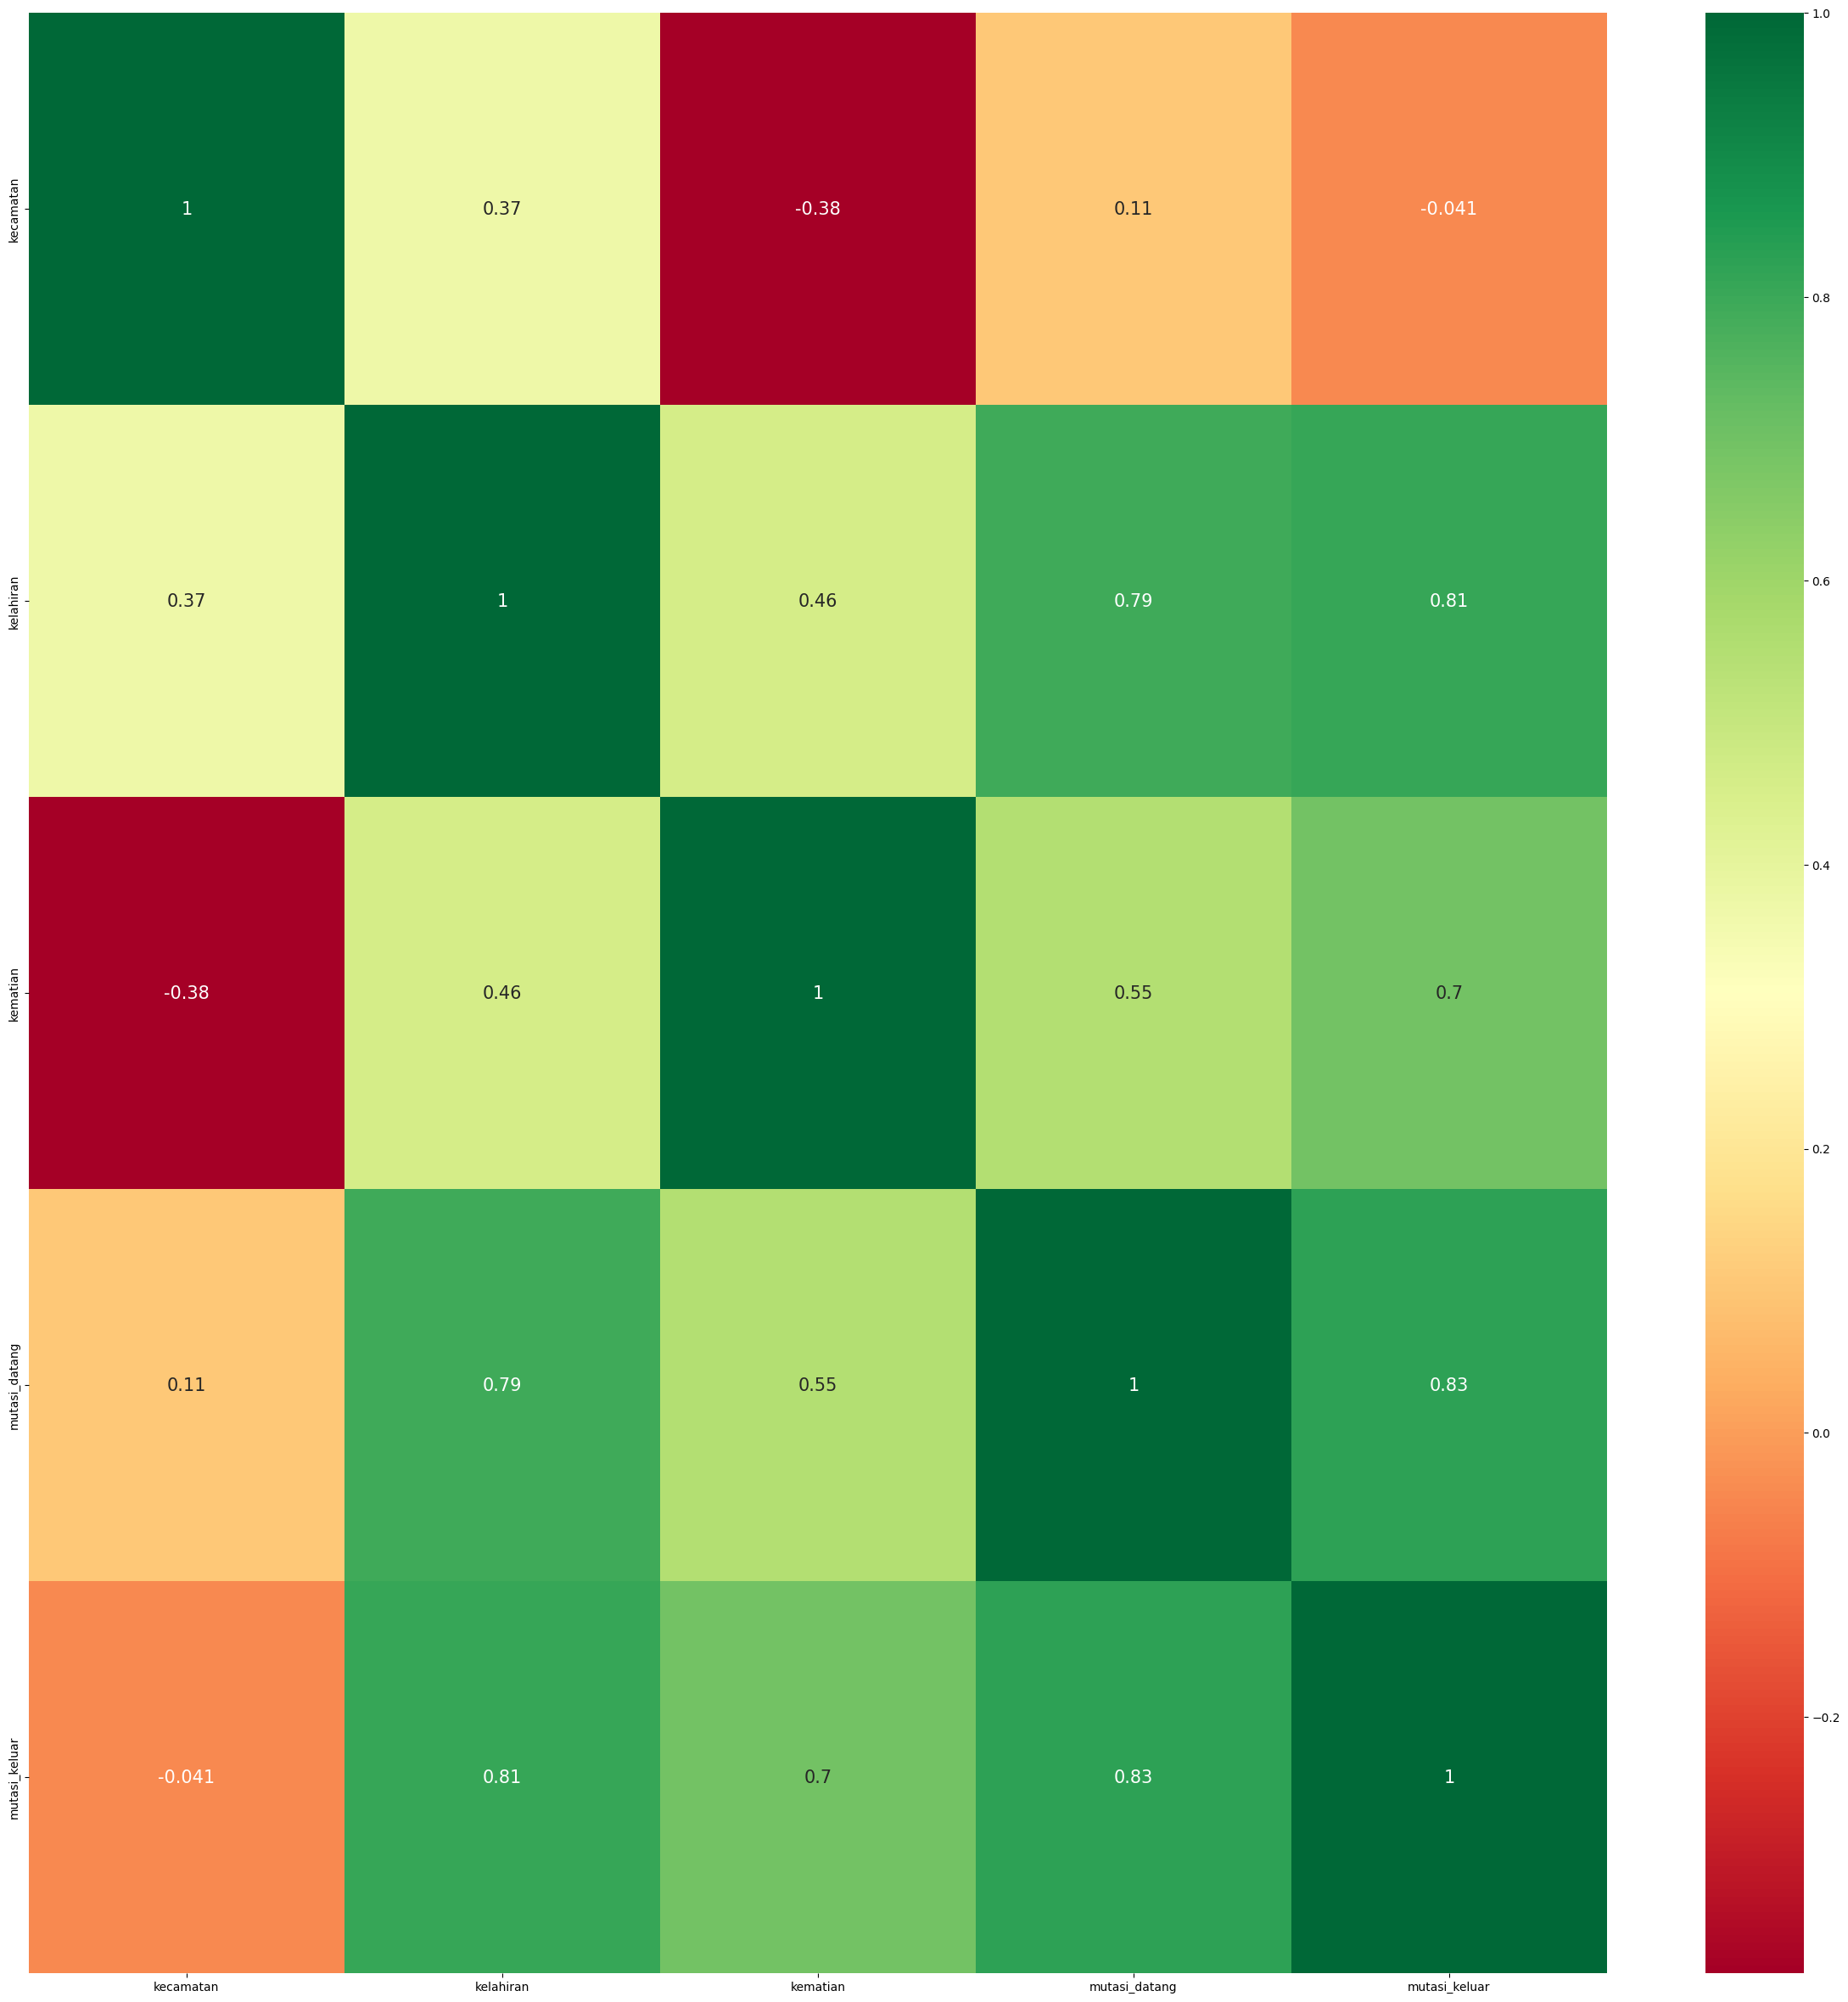

In [150]:
plt.figure(figsize=(30, 30))
sns.heatmap(population.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

<ipython-input-151-5d34d34882c2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  col = population.corr().nlargest(20, "kecamatan").kecamatan.index


<Axes: >

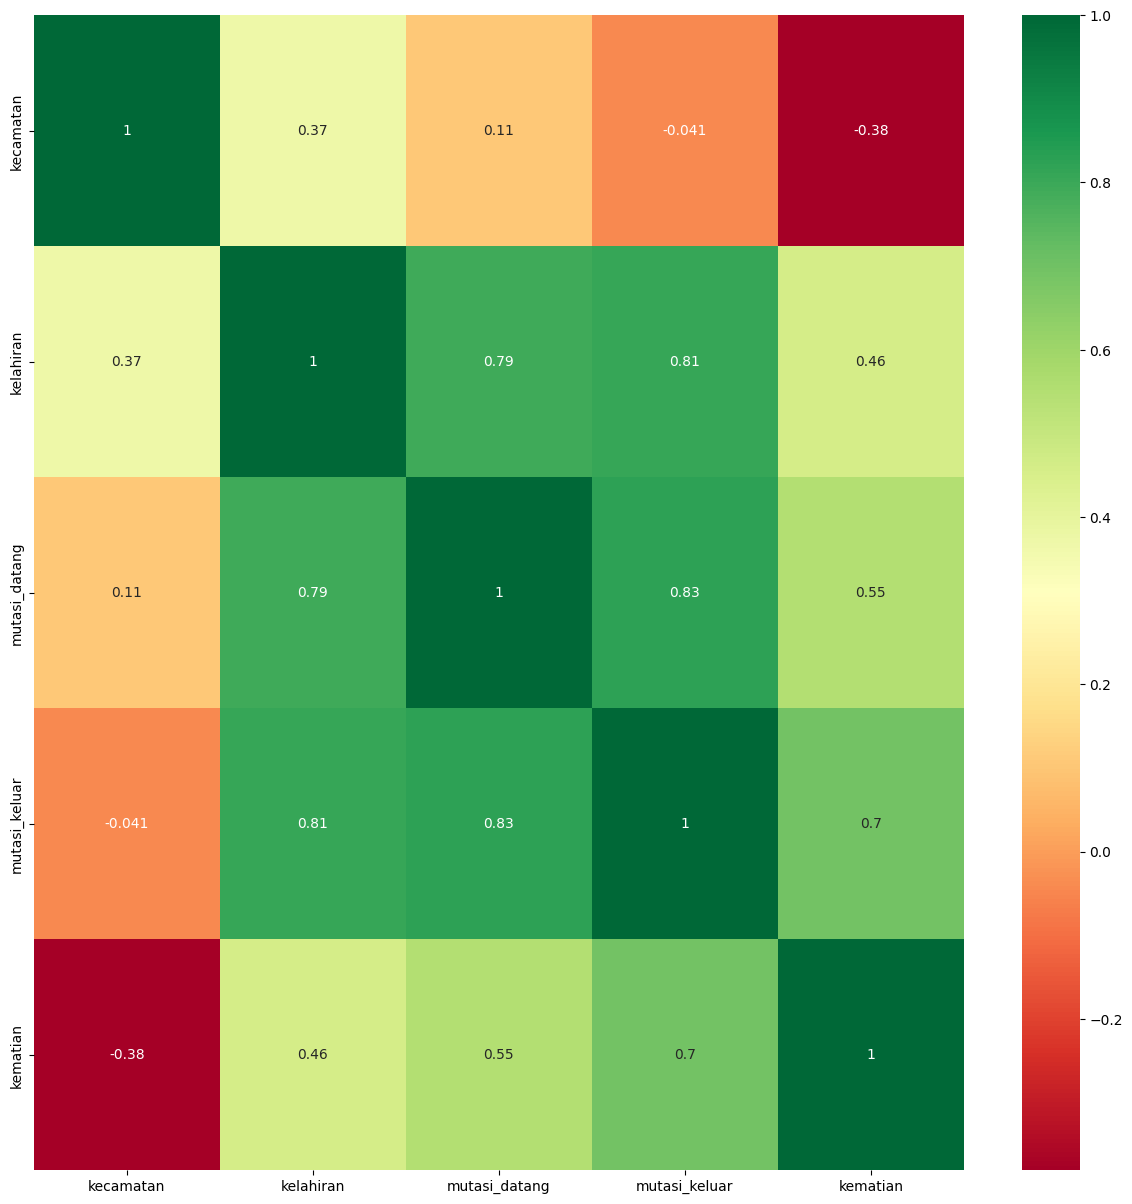

In [151]:
col = population.corr().nlargest(20, "kecamatan").kecamatan.index
plt.figure(figsize=(15, 15))
sns.heatmap(population[col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

In [152]:
population.drop('kecamatan', axis=1).corrwith(population.kecamatan).hvplot.barh()

<ipython-input-152-e5adc2cfc8f2>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  population.drop('kecamatan', axis=1).corrwith(population.kecamatan).hvplot.barh()


:Bars   [index]   (0)